# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect11. CNN (Convolutional Newural Network)

### 1. MNIST CNN

In [1]:
import time
import os

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

In [2]:
# Lab 11 MNIST and Convolutional Neural Network
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


![Graph](./images/lab11_simple_cnn.png)

### Convolution Layer1

In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
print('W1 (tf.random_normal) \t: ', W1)
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
print('tf.nn.conv2d \t: ', L1)
L1 = tf.nn.relu(L1)
print('tf.nn.relu \t: ', L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print('tf.nn.max_pool \t: ', L1)
# '''
# Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
# Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
# Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
# '''


W1 (tf.random_normal) 	:  Tensor("Variable/read:0", shape=(3, 3, 1, 32), dtype=float32)
tf.nn.conv2d 	:  Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
tf.nn.relu 	:  Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
tf.nn.max_pool 	:  Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


### Convolution Layer2

In [4]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
print('W2 (tf.random_normal) \t: ', W2)
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
print('tf.nn.conv2d \t:', L2)
L2 = tf.nn.relu(L2)
print('tf.nn.relu \t:', L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print('tf.nn.max_pool \t:', L2)
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
print('tf.reshape \t:', L2_flat)
# '''
# Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
# Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
# Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
# Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
# '''

W2 (tf.random_normal) 	:  Tensor("Variable_1/read:0", shape=(3, 3, 32, 64), dtype=float32)
tf.nn.conv2d 	: Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
tf.nn.relu 	: Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
tf.nn.max_pool 	: Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
tf.reshape 	: Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


### Fully Connected (FC, Dense) layer

In [5]:
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
print('W3 (xavier_initializer) \t: ', W3)

b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

print('cost :', cost)
print('optimizer :\n', optimizer)

W3 (xavier_initializer) 	:  Tensor("W3/read:0", shape=(3136, 10), dtype=float32)
cost : Tensor("Mean:0", shape=(), dtype=float32)
optimizer :
 name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/update_W3/ApplyAdam"
input: "^Adam/update_Variable_2/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



### Training

In [6]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
time1 = time.time()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')
time2 = time.time()

chk_processting_time(time1, time2)

Learning started. It takes sometime.
Epoch: 0001 cost = 0.358514333
Epoch: 0002 cost = 0.098277139
Epoch: 0003 cost = 0.070610365
Epoch: 0004 cost = 0.057040289
Epoch: 0005 cost = 0.047120309
Epoch: 0006 cost = 0.041251445
Epoch: 0007 cost = 0.036282639
Epoch: 0008 cost = 0.032006412
Epoch: 0009 cost = 0.027889032
Epoch: 0010 cost = 0.024118069
Epoch: 0011 cost = 0.021238505
Epoch: 0012 cost = 0.020259268
Epoch: 0013 cost = 0.016682331
Epoch: 0014 cost = 0.013662303
Epoch: 0015 cost = 0.013655864
Learning Finished!
처리시간 : 13분 52초 경과되었습니다.


832.6799268722534

### Evaluation 

Accuracy: 0.9874
Label:  [3]
Prediction:  [3]


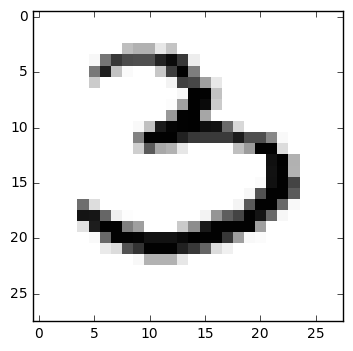

In [7]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>